# 라이브러리 임포트

In [1]:
! pip install -U pandas-profiling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline

     |████████████████████████████████| 261 kB 4.0 MB/s 
     |████████████████████████████████| 62 kB 547 kB/s 
     |████████████████████████████████| 303 kB 30.8 MB/s 
     |████████████████████████████████| 675 kB 38.9 MB/s 
     |████████████████████████████████| 3.1 MB 40.4 MB/s 
     |████████████████████████████████| 596 kB 48.1 MB/s 
     |████████████████████████████████| 102 kB 9.4 MB/s 
     |████████████████████████████████| 10.1 MB 12.7 MB/s 
     |████████████████████████████████| 812 kB 30.3 MB/s 
     |████████████████████████████████| 38.1 MB 2.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=9aefc91ace312142219bbecac918cba7d7a82d88753ac0c579c8a7bf2b4bfeb8
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=e584f0afb173d4349424f3a2c7f0f64f735437570f7f73242e629de203e411d6
  

In [2]:
train = pd.read_csv('./dataset/train.csv')
test = pd.read_csv('./dataset/test.csv')

In [3]:
train.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.3,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white,6
1,2,7.5,0.38,0.29,4.9,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white,7
2,3,6.1,0.27,0.33,2.2,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white,6
3,4,6.4,0.32,0.50,10.7,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white,5
4,5,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red,7


# Quality(target) 별 train data 개수 분석

Int64Index([6, 5, 7, 4, 8], dtype='int64')


<BarContainer object of 5 artists>

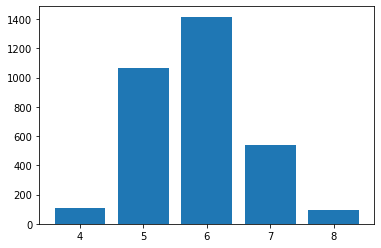

In [23]:
counted_values = train['quality'].value_counts()
print(counted_values.index)
plt.bar(x=counted_values.index, height=counted_values)

4하고 8의 개수가 다른 data에 비해 매우 적은 것을 볼 수 있다

# Quality별, feature 분석

1. Mean
2. Feature distribution

In [4]:
train_grouped = train.groupby('quality').mean().drop('id', axis = 1)
train_grouped

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
4,7.275926,0.469028,0.260926,3.962037,0.056972,20.796296,104.356481,0.994770,3.232870,0.505833,10.180556
5,7.339757,0.383634,0.313143,5.889476,0.064714,30.526193,121.696445,0.995868,3.204995,0.529897,9.846333
6,7.161142,0.309870,0.323886,5.548942,0.054214,30.960860,115.722849,0.994518,3.213801,0.531065,10.578573
7,7.127180,0.292653,0.331633,4.679221,0.045111,30.725417,108.591837,0.993034,3.225733,0.542801,11.445659
8,6.740206,0.288196,0.323093,5.260309,0.041825,35.814433,119.948454,0.992576,3.235464,0.519794,11.559794


총 11개 feature

Text(0.5, 0.98, 'Mean Values per Quality')

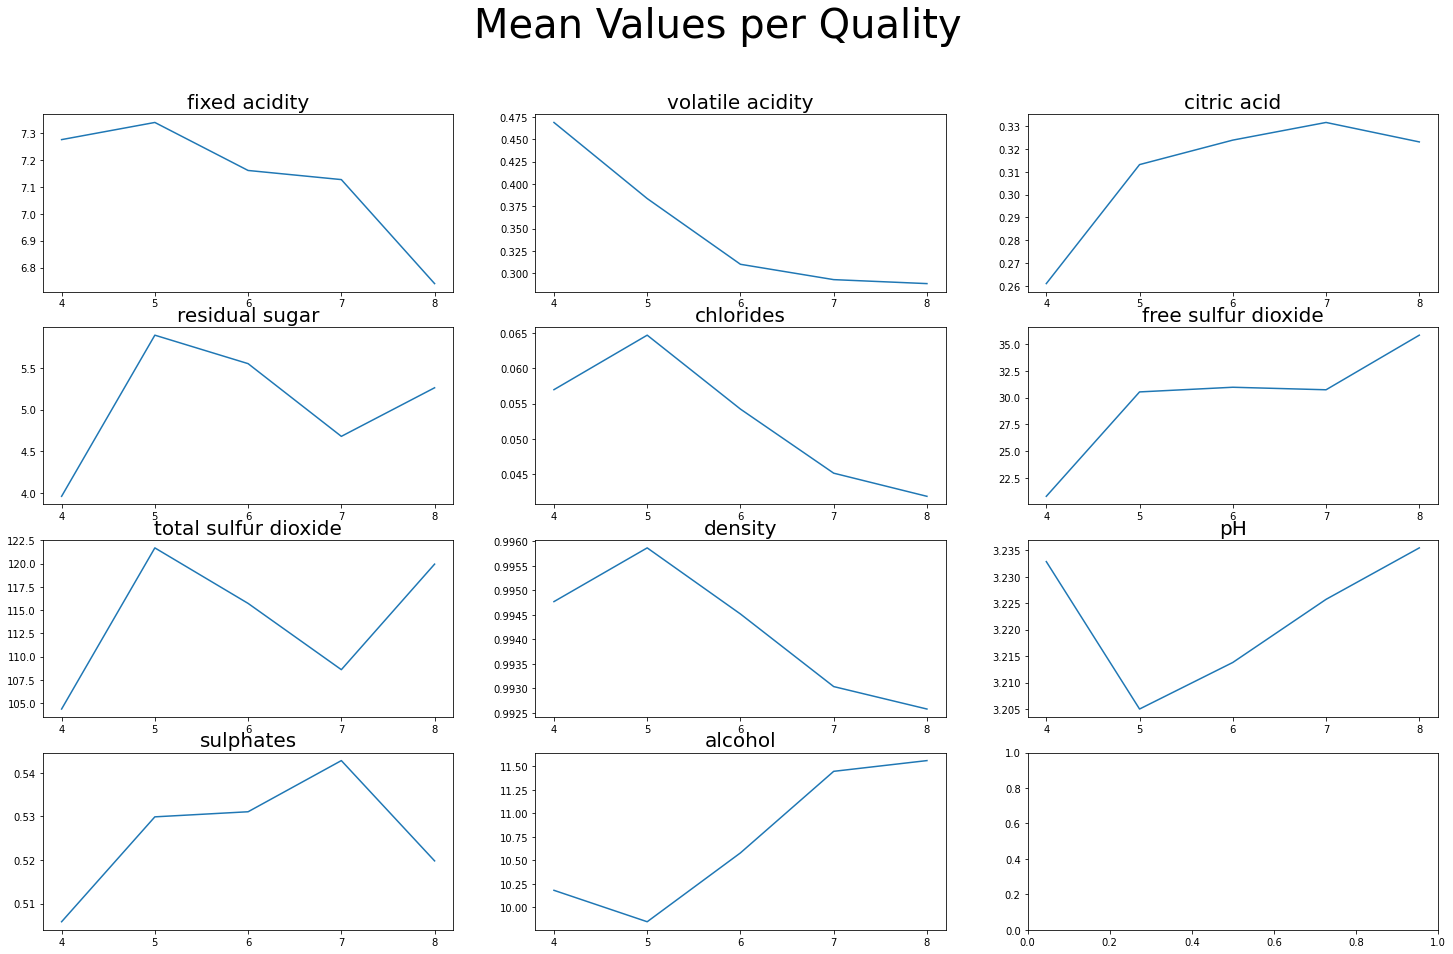

In [5]:
fig, axes = plt.subplots(4,3, figsize=(25,15))
for ax, col in zip(axes.flatten(), train_grouped.columns):
    # 그래프 별 제목
    ax.set_title(col, fontsize=20)
    # x축 눈금 설정
    ax.set_xticks([4,5,6,7,8])
    # 그래프 데이터
    ax.plot([4,5,6,7,8], train_grouped[col])
fig.suptitle("Mean Values per Quality", fontsize=40)


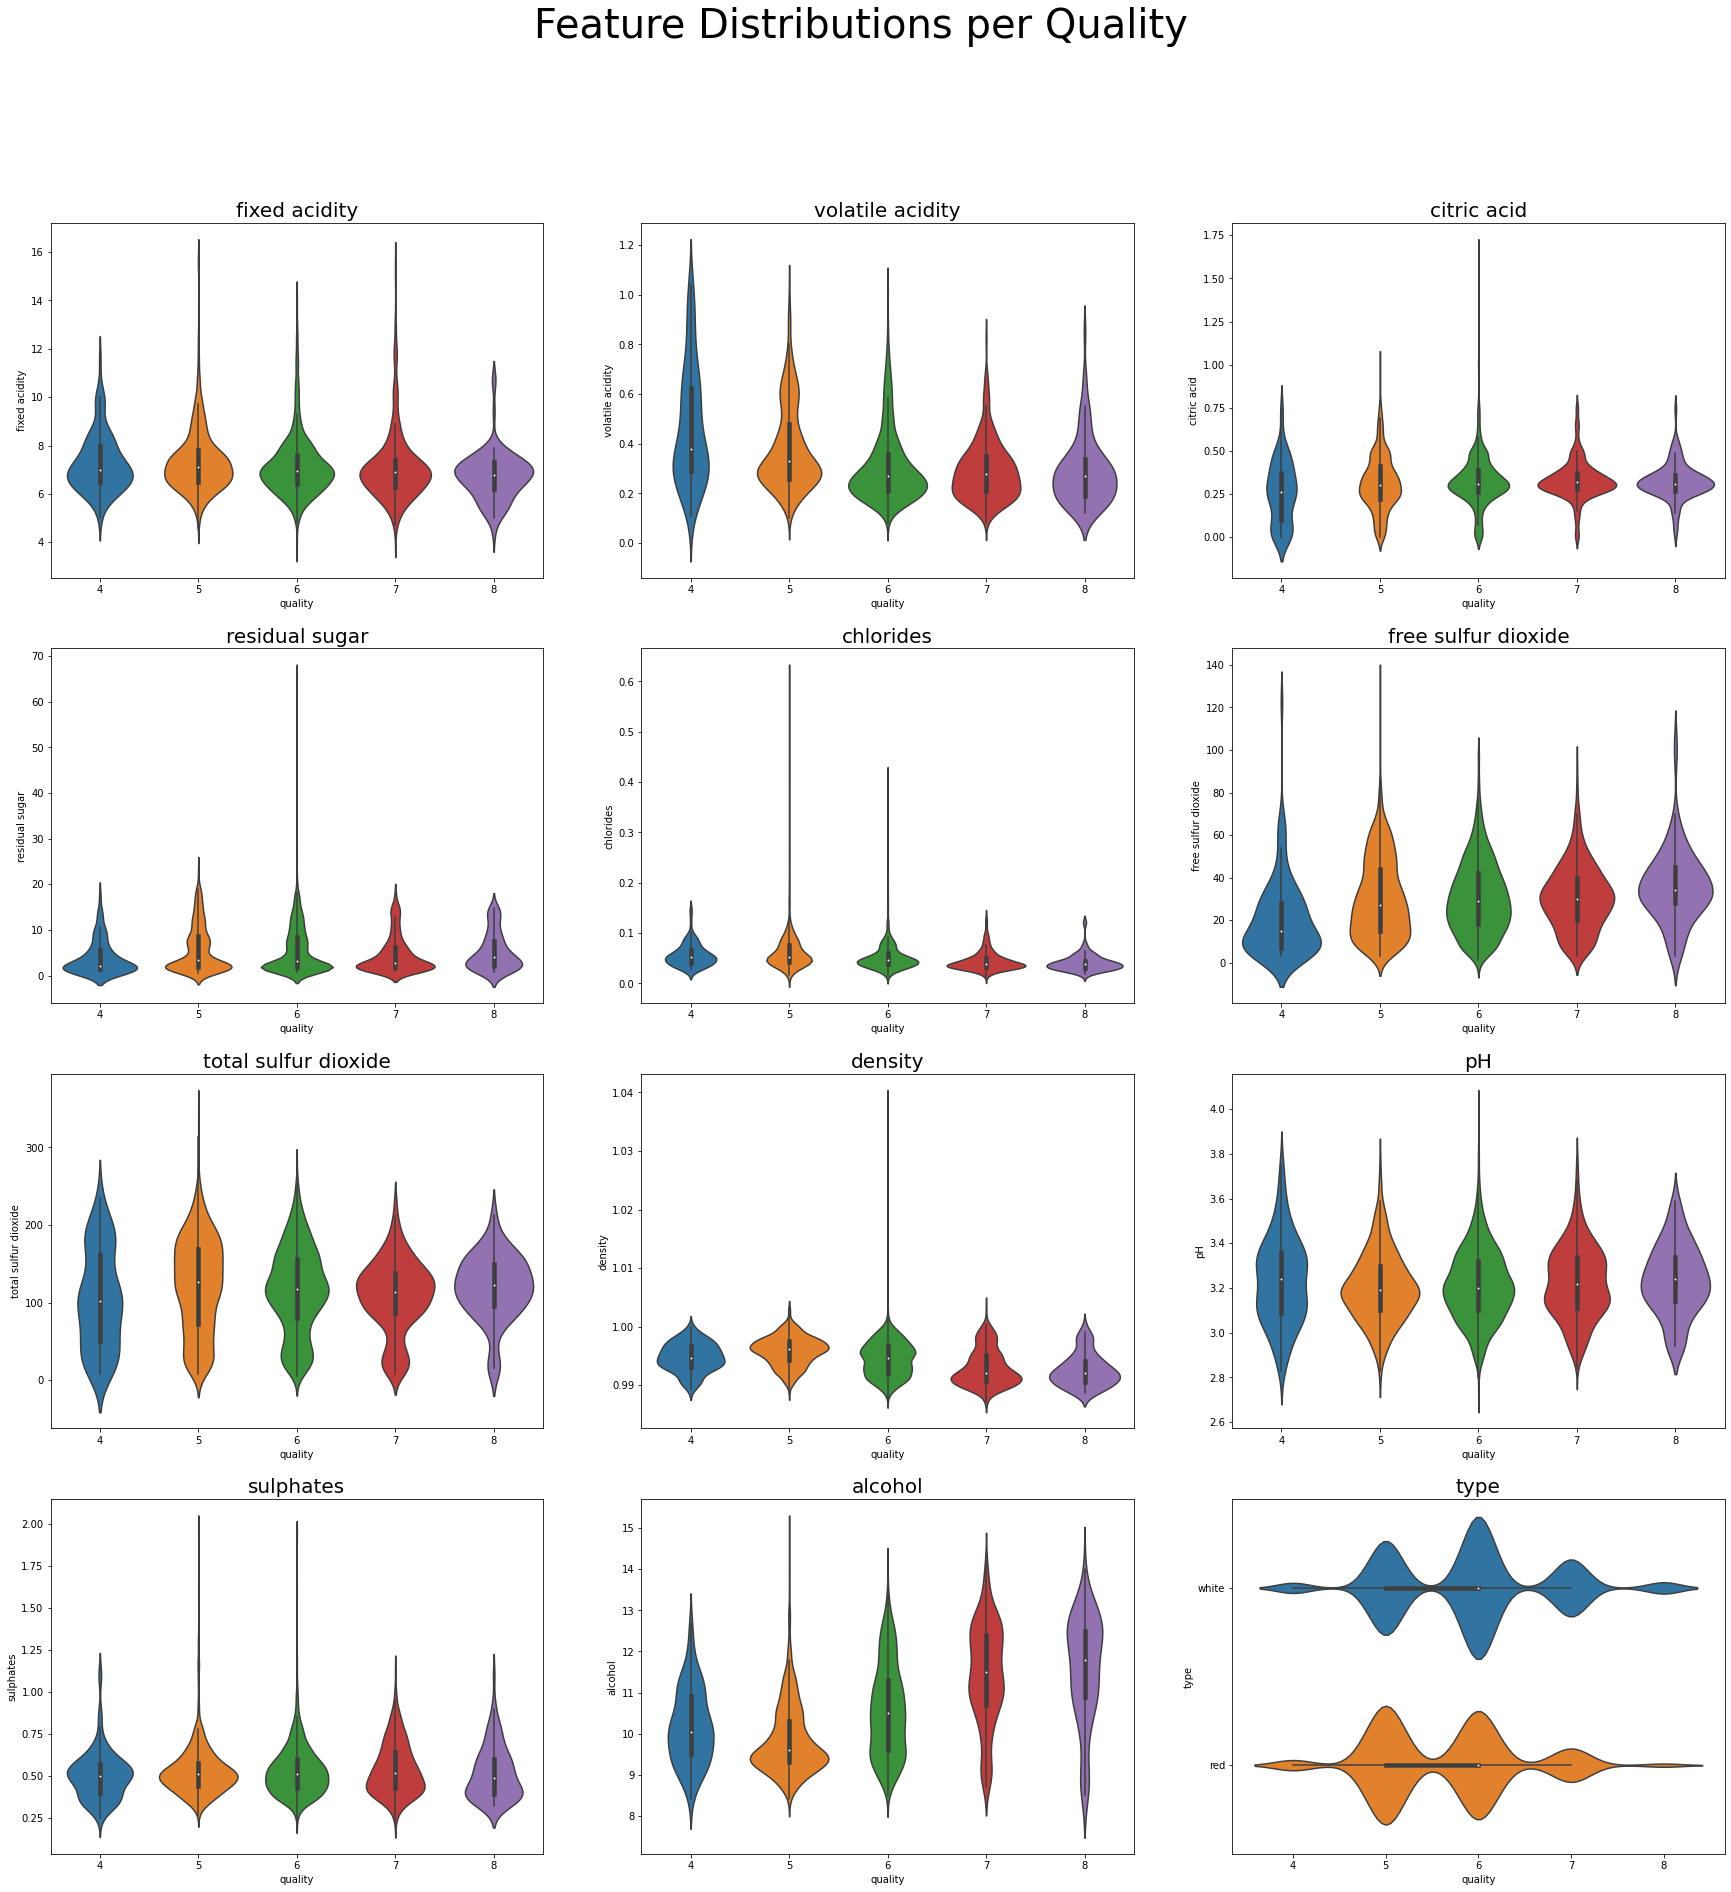

In [6]:
fig, axes = plt.subplots(4,3,figsize=(30,30))

fig.suptitle('Feature Distributions per Quality', fontsize=40)
for ax, col in zip(axes.flatten(), train.columns[1:]):
    ax.set_title(col, fontsize=20)
    sns.violinplot(x = 'quality', y = col, ax = ax, data = train)

# 상관 관계

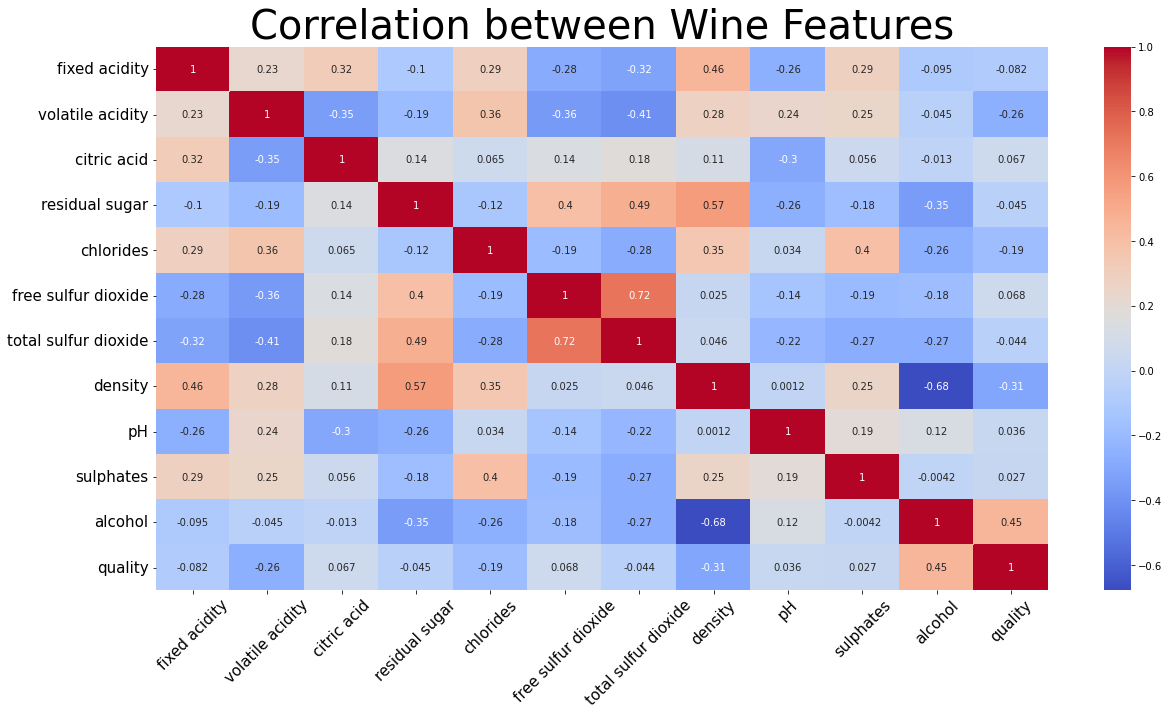

In [7]:
plt.figure(figsize=(20,10))

heat_table = train.drop('id',axis=1).corr()
heatmap_ax = sns.heatmap(data = heat_table, annot=True, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize = 15, rotation=45 )
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize = 15)
plt.title('Correlation between Wine Features', fontsize = 40)
plt.show()

## 다음 두가지를 분석해보자
- total sulfur dioxide, free sulfur dioxide
- alcohol, density

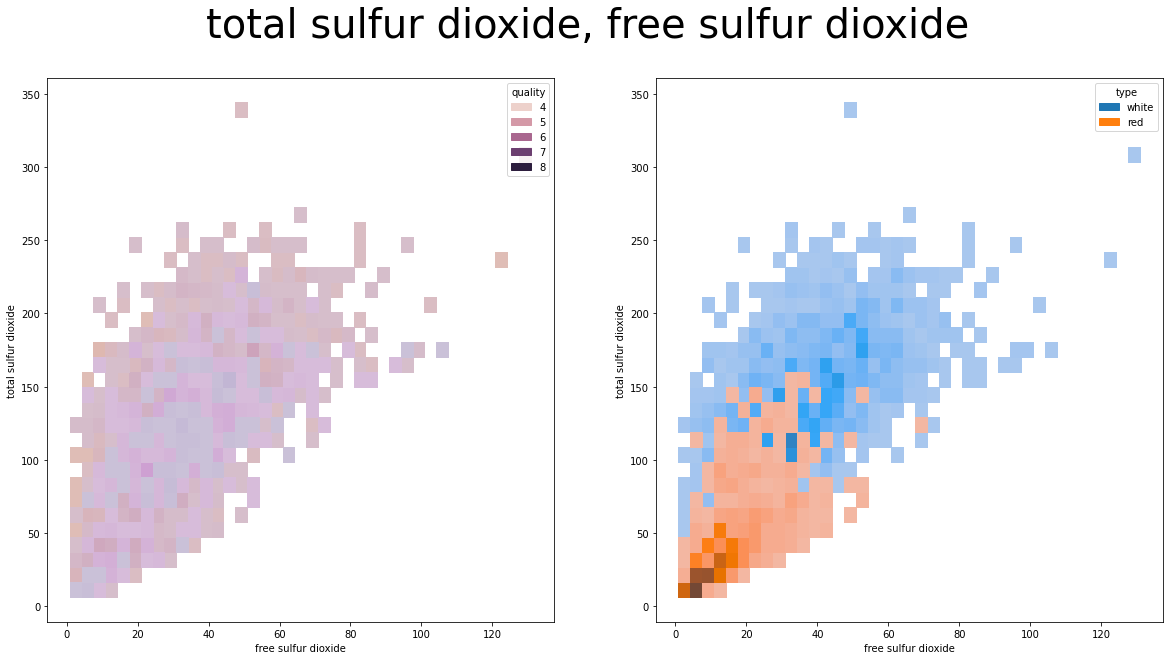

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

for i,ax in enumerate(axes):
    if i== 0:
        sns.histplot(x = 'free sulfur dioxide', y = 'total sulfur dioxide', hue = 'quality', data = train, ax = ax)
    else :
        sns.histplot(x = 'free sulfur dioxide', y = 'total sulfur dioxide', hue = 'type', data = train, ax = ax)
fig.suptitle('total sulfur dioxide, free sulfur dioxide', fontsize=40)
plt.show()

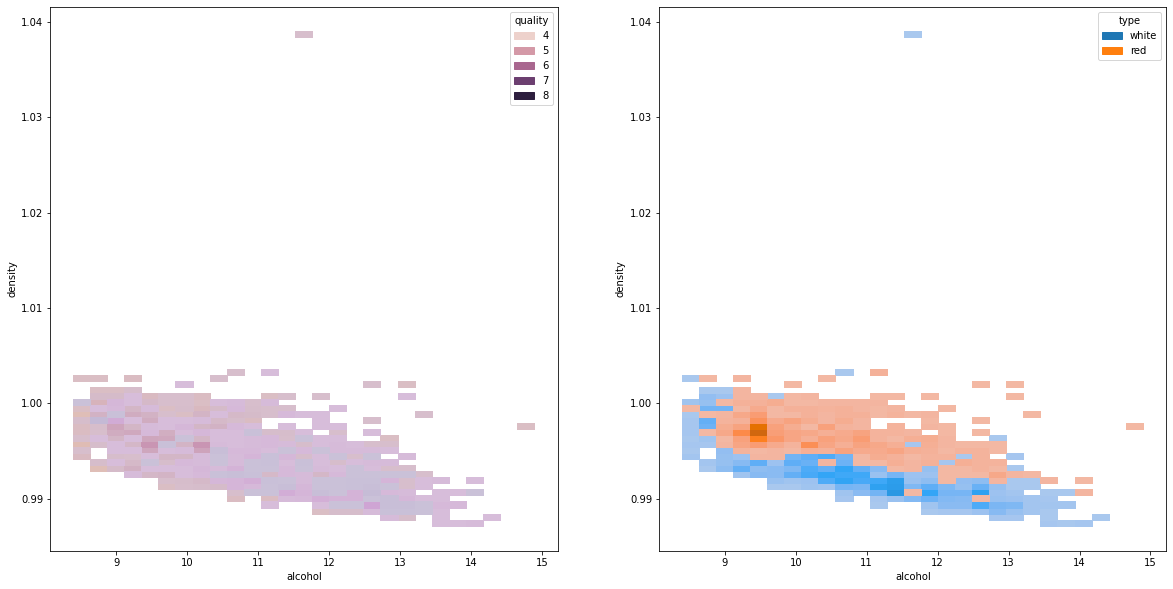

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

for i,ax in enumerate(axes):
    if i== 0:
        sns.histplot(x = 'alcohol', y = 'density', hue = 'quality', data = train, ax = ax)
    else :
        sns.histplot(x = 'alcohol', y = 'density', hue = 'type', data = train, ax = ax)

plt.show()

density > 1.03인 outlier(이상치)를 제거해보자

In [10]:
train_ = train[train.density < 1.03]

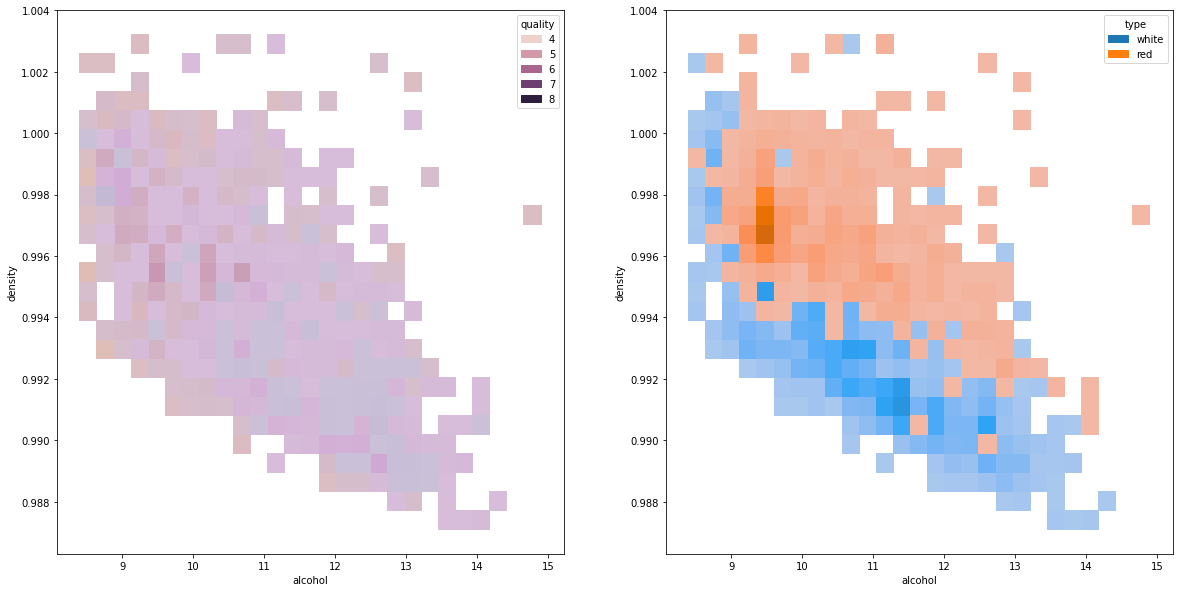

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

for i,ax in enumerate(axes):
    if i== 0:
        sns.histplot(x = 'alcohol', y = 'density', hue = 'quality', data = train_, ax = ax)
    else :
        sns.histplot(x = 'alcohol', y = 'density', hue = 'type', data = train_, ax = ax)

plt.show()

- 훨씬 데이터가 깨끗하게 나오는 걸 볼 수 있다. Outlier를 제거하면 데이터의 분포를 더 잘 보는데 도움이 된다
- 어느정도 음의 상관관계를 띄고 있다

In [12]:
train[train['density']>1.03]

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
1368,1369,7.8,0.965,0.6,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,white,6


```density > 1.03``` 

```residual sugar > 65``` 

두 outlier를 가지고 있는 항목이 같은 항목이었음을 확인할 수 있다. 제거해준다

In [13]:
train = train[train['density'] < 1.03]

In [14]:
train

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.30,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white,6
1,2,7.5,0.38,0.29,4.90,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white,7
2,3,6.1,0.27,0.33,2.20,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white,6
3,4,6.4,0.32,0.50,10.70,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white,5
4,5,8.4,0.37,0.43,2.30,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,6.4,0.16,0.31,5.30,0.043,42.0,157.0,0.99455,3.35,0.47,10.5,white,5
3227,3228,6.4,0.18,0.28,17.05,0.047,53.0,139.0,0.99724,3.25,0.35,10.5,white,6
3228,3229,6.0,0.28,0.25,1.80,0.042,8.0,108.0,0.99290,3.08,0.55,9.0,white,5
3229,3230,7.7,0.28,0.29,6.90,0.041,29.0,163.0,0.99520,3.44,0.60,10.5,white,6


# New Feature Generation

먼저 train과 test를 합쳐서 matrix를 만들자

In [15]:
train_num = train.shape[0]
test_num = test.shape[0]

matrix = pd.concat([train,test], axis = 0)
matrix.shape

(6461, 14)

In [16]:
matrix

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.3,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,white,6.0
1,2,7.5,0.38,0.29,4.9,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,white,7.0
2,3,6.1,0.27,0.33,2.2,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,white,6.0
3,4,6.4,0.32,0.50,10.7,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,white,5.0
4,5,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,red,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,7.1,0.32,0.24,13.1,0.050,52.0,204.0,0.99800,3.10,0.49,8.8,white,NaN
3227,3228,5.6,0.28,0.40,6.1,0.034,36.0,118.0,0.99144,3.21,0.43,12.1,white,NaN
3228,3229,7.3,0.31,0.69,10.2,0.041,58.0,160.0,0.99770,3.06,0.45,8.6,white,NaN
3229,3230,5.2,0.34,0.37,6.2,0.031,42.0,133.0,0.99076,3.25,0.41,12.5,white,NaN


```residual sugar > 45

```residual sugar > 45``` 를 기준으로, ```sweet``` feature를 만들자

In [ ]:
# -1로 초기화
matrix['sweet'] = -1
matrix[matrix['residual sugar'] > 45] = 